In [8]:
import pandas as pd
import math
import numpy as np

In [2]:
# Load the CSV file
df = pd.read_csv('Semester Long Project Dataset.csv')

In [ ]:
np.mean([df['# of tweets']])

23.21

The mean number of tweets for the NBA players of the top 5 and bottom 5 teams in the NBA for the years 2021-2022 and 2022-2023 is 23.21

In [10]:
winners= df[df['Team Rank'] <= 5]
print(winners)

       Season       Team  Team Rank                    Player  # of tweets  \
0   2021-2022    Celtics          5              Jayson Tatum           41   
1   2021-2022    Celtics          5              Jaylen Brown           40   
2   2021-2022    Celtics          5                Al Horford           20   
3   2021-2022    Celtics          5              Marcus Smart           20   
4   2021-2022    Celtics          5             Derrick White            1   
5   2021-2022   Warriors          3               Steph Curry           40   
6   2021-2022   Warriors          3            Draymond Green           20   
7   2021-2022   Warriors          3             Klay Thompson           10   
8   2021-2022   Warriors          3            Andrew Wiggins            5   
9   2021-2022   Warriors          3              Kevon Looney            2   
10  2021-2022  Grizzlies          2              Steven Adams            2   
11  2021-2022  Grizzlies          2              Desmond Bane   

In [12]:
losers = df[df['Team Rank'] > 5]
print (losers)

       Season     Team  Team Rank              Player  # of tweets  \
25  2021-2022  Rockets         29         Eric Gordon           15   
26  2021-2022  Rockets         29         Jalen Green            4   
27  2021-2022  Rockets         29    Kevin Porter Jr.            0   
28  2021-2022  Rockets         29        Jaesean Tate           15   
29  2021-2022  Rockets         29      Christian Wood           18   
30  2021-2022    Magic         30        Cole Anthony           20   
31  2021-2022    Magic         30      Wendell Carter           13   
32  2021-2022    Magic         30            Mo Bamba           14   
33  2021-2022    Magic         30         Jalen Suggs            7   
34  2021-2022    Magic         30        Franz Wagner            0   
35  2021-2022  Thunder         27      Darius Bazeley           38   
36  2021-2022  Thunder         27       Luguentz Dort            0   
37  2021-2022  Thunder         27         Josh Giddey           20   
38  2021-2022  Thund

In [15]:
print(np.mean([winners['# of tweets']]), np.mean([losers['# of tweets']]))

31.76 14.66


According to our data, the winners tweet 31.76 times on average over the season while the losers tweet 14.66 times over the season. 

In [18]:
season_team_tweets = df.groupby(['Season', 'Team'])['# of tweets'].sum().reset_index()
print(season_team_tweets)

       Season       Team  # of tweets
0   2021-2022    Celtics          122
1   2021-2022  Grizzlies          319
2   2021-2022       Heat           53
3   2021-2022      Magic           54
4   2021-2022     Pacers           94
5   2021-2022    Pistons           20
6   2021-2022    Rockets           52
7   2021-2022       Suns          337
8   2021-2022    Thunder           75
9   2021-2022   Warriors           77
10  2022-2023      76ers          137
11  2022-2023    Blazers           33
12  2022-2023      Bucks          197
13  2022-2023       Cavs          136
14  2022-2023    Celtics          182
15  2022-2023    Hornets           37
16  2022-2023    Nuggets           28
17  2022-2023    Pistons            3
18  2022-2023    Rockets          161
19  2022-2023      Spurs          204


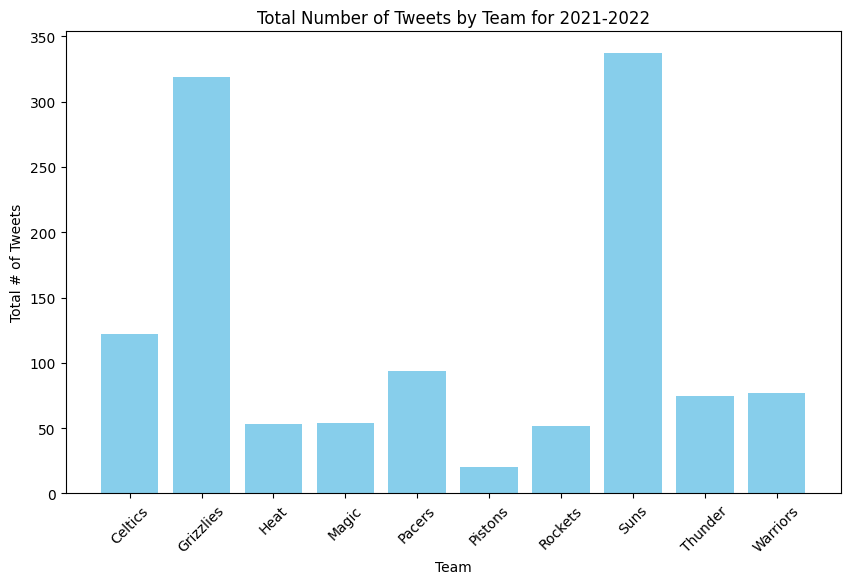

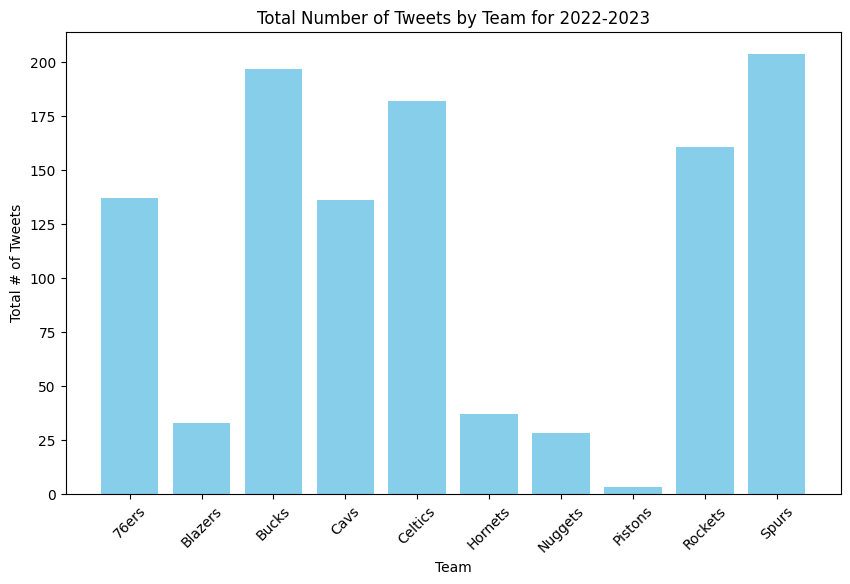

In [19]:
import matplotlib.pyplot as plt
seasons = season_team_tweets['Season'].unique()
for season in seasons:
    season_data = season_team_tweets[season_team_tweets['Season'] == season]
    
    plt.figure(figsize=(10, 6))
    plt.bar(season_data['Team'], season_data['# of tweets'], color='skyblue')
    plt.xlabel('Team')
    plt.ylabel('Total # of Tweets')
    plt.title(f'Total Number of Tweets by Team for {season}')
    plt.xticks(rotation=45)
    plt.show()

These graphs do a good job vizualizing the number of tweets per team, but you can't see which teams were good and which teams were bad in which graph. It might be a good idea to add a win totals column to our CSV file, which we could use to a regression. 

Based on the win totals for these teams that were not included in the data, it seems there's a weak correlation between teams that tweet more and wins. Looking at 2022-2023, the tall bars on the graph being the 76ers, Bucks, Cavs, Celtics, Rockets and Spurs, 4 out of the  6 were top 5 in the NBA that year. In 2021-2022, the tall bars are the Grizzlies and the Suns, both in the top 5. However, we can't overlook the fact that the nuggets were one of the best teams in the NBA in 2022, yet had very little tweets. Or the rockets and Spurs being bottom 5 teams having tons of tweets. 